In [1]:
##General utilities
import torch
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image as im

from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer

In [26]:
new_cfg = get_cfg()
new_cfg.merge_from_file("myconfig.yml") 
new_cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6
new_cfg.MODEL.WEIGHTS = "./output_drive/model_final.pth"

predictor = DefaultPredictor(new_cfg)

In [27]:
image_name = 'test3.jpg'
im = cv2.imread('validation/' + image_name)
outputs = predictor(im)

pred_masks = outputs["instances"].to("cpu").pred_masks.numpy()
categories = outputs["instances"].to("cpu").pred_classes.numpy()
predicted_boxes = outputs["instances"].to("cpu").pred_boxes

v = Visualizer(im[:, :, ::-1],
            metadata=None, 
            scale=2, 
)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

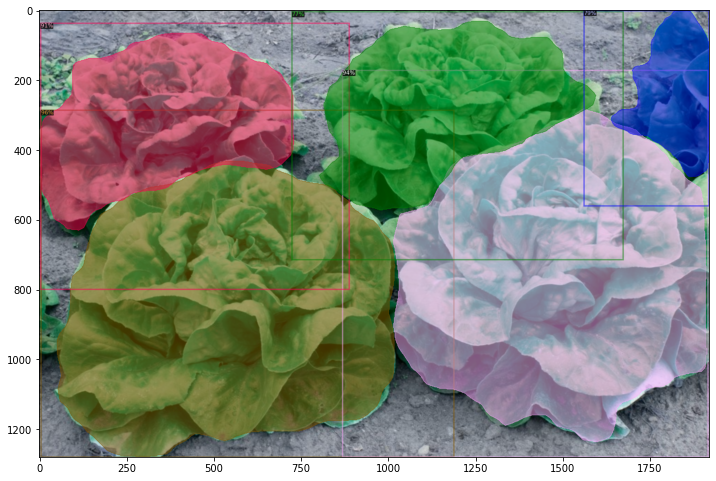

In [28]:
plt.rcParams['figure.figsize'] = (12, 24)
plt.imshow(v.get_image()[:, :, ::-1])
plt.show()

In [30]:
outputs

{'instances': Instances(num_instances=5, image_height=640, image_width=960, fields=[pred_boxes: Boxes(tensor([[  2.9649, 144.1120, 594.2562, 640.0000],
         [435.1874,  87.3517, 958.5685, 640.0000],
         [  2.2819,  20.1478, 444.7460, 400.2646],
         [781.0432,   1.7718, 960.0000, 281.3012],
         [362.6193,   3.5294, 837.1570, 357.7774]], device='cuda:0')), scores: tensor([0.9614, 0.9398, 0.9147, 0.7890, 0.7746], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0, 0], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],
 
         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False,